In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.ticker as mticker

In [2]:
import sys
print(sys.executable)


c:\Users\nahue\Documents\Ceia\Analisis de Datos\venv\Scripts\python.exe


In [3]:
producto = pd.read_csv("productos.csv", sep="|", encoding="utf-8", dtype=str) # traigo todo como string y luego modifico el tipo de variable para cada feature
producto.sample(10)


,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
1212692,10,3,606,7795323775492,1,LECHE FLUIDA INFANT ET1 LA SERENISIMA BABY X 2...,1,UNI,LA SERENISIMA BABY,1759.00,8795.00,200,CM3,NaN,NaN,NaN,NaN
1692447,10,1,54,7792280005990,1,YERBA HIERBAS SERRANAS CON CEDRON CACHAMATE X ...,1,UNI,CACHAMATE,3800.00,3800.00,1000,GRM,NaN,NaN,NaN,NaN
2120728,10,1,239,7798108345866,1,JABON ANTIBAC ALOE VERA CARREFOUR DP X 240 CC,1,UNI,CARREFOUR,1850.00,7708.33,240,CM3,NaN,NaN,NaN,NaN
1142610,10,1,11,7798159715755,1,GASEOSA TONICA REG CARREFOUR PET X 2.25 LT,1,UNI,CARREFOUR,1540.00,684.44,2250,CM3,NaN,NaN,NaN,NaN
2520878,10,1,18,7791293042718,1,DESODORANTE DARK TEMPTATION AXE X 150 CC,1,UNI,AXE,3019.00,20126.67,150,CM3,NaN,NaN,NaN,NaN
282553,10,3,597,7792798015061,1,CERVEZA BLANCA BRAHMA LATA X 710 CC,1,UNI,BRAHMA,3399.00,4787.32,710,CM3,NaN,NaN,NaN,NaN
335925,10,2,206,7790070509109,1,YERBA MATE SUAVE NOBLEZA GAUCHA X 500 GR,1,UNI,NOBLEZA GAUCHA,2100.00,4200.00,500,GRM,NaN,NaN,NaN,NaN
75340,10,3,472,7791720003886,1,ATUN AL NATURAL DESMENUZADO BULNEZ LATA X170GR,1,UNI,BULNEZ,1230.00,7235.29,170,GRM,NaN,NaN,NaN,NaN
1798613,10,2,120,7790070760623,1,VINO BLANCO DULCE NATURAL BENJAMIN X 750 CC,1,UNI,BENJAMIN NIETO,5600.00,7466.67,750,CM3,NaN,NaN,NaN,NaN
2389723,10,3,378,7613287613226,1,ALIMENTOS PERROS DOGUI CACHORROS 1.5KG,1,UNI,DOGUI,4982.00,4982.00,1,UNI,NaN,NaN,NaN,NaN


Miraremos los valores únicos para determinar la importancia de cada atributo

In [5]:

producto = producto.rename(columns={"ï»¿id_comercio": "id_comercio"})

producto
# Lista de las columnas de las que quieres ver los valores únicos
columnas_a_revisar = [
    'productos_ean',
    'id_bandera',
    'id_comercio',
    'id_sucursal',
    'productos_cantidad_presentacion',
    'productos_cantidad_referencia',
    'productos_leyenda_promo1',
    'productos_precio_unitario_promo1',
    'productos_leyenda_promo2',
    'productos_precio_unitario_promo2'
]

# Iterar sobre la lista de columnas e imprimir los valores únicos de cada una
print("--- Valores Únicos por Columna ---")
for col in columnas_a_revisar:
    # Comprobamos si la columna existe en el DataFrame para evitar errores
    if col in producto.columns:
        valores_unicos = producto[col].unique()
        print(f"\nColumna: '{col}'")
        print(valores_unicos)
    else:
        print(f"\nAdvertencia: La columna '{col}' no se encontró en el DataFrame.")

--- Valores Únicos por Columna ---

Columna: 'productos_ean'
['1' '0' nan]

Columna: 'id_bandera'
['1' '3' '2' nan]

Columna: 'id_comercio'
['10' 'Ultima actualización: 2025-06-27T05:13:49-03:00']

Columna: 'id_sucursal'
['63' '711' '44' '62' '147' '54' '438' '290' '482' '289' '125' '123' '697'
 '48' '288' '23' '462' '599' '15' '212' '557' '656' '563' '1' '16' '526'
 '767' '120' '272' '241' '161' '21' '490' '28' '203' '268' '175' '150'
 '17' '605' '205' '41' '183' '263' '9' '240' '719' '46' '265' '348' '577'
 '11' '5' '536' '299' '338' '450' '8' '29' '229' '31' '386' '766' '216'
 '714' '259' '182' '497' '214' '600' '597' '757' '184' '22' '12' '650'
 '729' '747' '115' '341' '616' '219' '211' '7' '367' '10' '694' '218'
 '232' '226' '234' '255' '363' '2' '47' '297' '215' '277' '119' '239'
 '496' '18' '233' '217' '296' '213' '735' '792' '295' '580' '191' '796'
 '466' '26' '179' '415' '51' '143' '672' '667' '627' '680' '574' '162'
 '243' '118' '475' '130' '42' '391' '33' '429' '52' '30' '22

**Columnas a eliminar:**
- id_comercio
- productos_cantidad_presentacion
- productos_leyenda_promo2
- productos_precio_unitario_promo2
- productos_ean
- id_bandera

Podemos eliminarlas porque consideramos que no aportan informacion


**Columnas para pasar a int**
- id_sucursal
- productos_cantidad_referencia

**Columnas para convertir a float32**  
- productos_precio_lista
- productos_precio_referencia
- productos_precio_unitario_promo1

Las otras columnas las dejamos como string


In [4]:
producto.drop(columns=[
    'productos_ean',
    'id_bandera',
    'id_comercio',
    'productos_cantidad_presentacion',
    'productos_leyenda_promo2',
    'productos_precio_unitario_promo2'
], inplace=True)


columnas_a_convertir_int = [

    'id_sucursal',
    'productos_cantidad_referencia'
]


#print("\nIniciando conversión...")
for col in columnas_a_convertir_int:
    if col in producto.columns:
        #print(f"Procesando columna: '{col}'")
        # Paso A: Convertir a numérico, forzando errores a NaN
        producto[col] = pd.to_numeric(producto[col], errors='coerce')

        # Paso B: Convertir a tipo entero nulable (Int64)
        producto[col] = producto[col].astype('Int64')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")


columnas_a_convertir_float = [
    'productos_precio_lista',
    'productos_precio_referencia',
    'productos_precio_unitario_promo1'
]

#print("\nIniciando conversión a float32...")
for col in columnas_a_convertir_float:
    if col in producto.columns:
        #print(f"Procesando columna: '{col}'")
        # Paso A: Convertir a numérico, forzando errores y vacíos a NaN
        # Paso B: Convertir al tipo float32 para ahorrar memoria
        producto[col] = pd.to_numeric(producto[col], errors='coerce').astype('float32')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")



In [5]:
producto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944411 entries, 0 to 2944410
Data columns (total 11 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   id_sucursal                           Int64  
 1   id_producto                           object 
 2   productos_descripcion                 object 
 3   productos_unidad_medida_presentacion  object 
 4   productos_marca                       object 
 5   productos_precio_lista                float32
 6   productos_precio_referencia           float32
 7   productos_cantidad_referencia         Int64  
 8   productos_unidad_medida_referencia    object 
 9   productos_precio_unitario_promo1      float32
 10  productos_leyenda_promo1              object 
dtypes: Int64(2), float32(3), object(6)
memory usage: 219.0+ MB


In [6]:
producto.describe()

,id_sucursal,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_precio_unitario_promo1
count,2944410.0,2.944410e+06,2.944410e+06,2944410.0,1.301340e+05
mean,284.582108,1.357243e+04,2.456660e+04,333.566095,8.431066e+04
std,231.803274,7.927854e+04,1.843814e+05,491.608742,2.300720e+05
min,1.0,2.800000e-01,1.600000e-01,0.0,1.900000e+01
25%,56.0,1.799000e+03,3.633330e+03,7.0,1.959000e+03
50%,229.0,3.240000e+03,8.500000e+03,170.0,6.990000e+03
75%,461.0,6.655000e+03,1.829412e+04,500.0,3.999000e+04
max,810.0,7.349000e+06,4.203333e+07,8000.0,6.199000e+06


### Eliminacion de Outliers para poder ver la distribucion de precios

Creemos que es relevante eliminar los valores ouliers de la columna productos_precio_lista, productos_precio_referencia y productos_precio_unitario_promo1, pero sin sobreescribir el dataframe, es decir, creamos otro dataframe.

In [7]:
# 1. Define las columnas de precios a revisar
columnas_precio = [
    'productos_precio_lista',
    
]

# 2. Inicializa una máscara booleana para marcar filas como outliers.
#    Inicialmente, ninguna fila es considerada un outlier.
is_outlier = pd.Series(False, index=producto.index)

# 3. Itera sobre cada columna de precios para encontrar sus outliers
for col in columnas_precio:
    # Asegúrate de que la columna exista y no esté vacía antes de calcular
    if col in producto.columns and not producto[col].isnull().all():
        # Calcula Q1, Q3 y el IQR para la columna actual
        Q1 = producto[col].quantile(0.25)
        Q3 = producto[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calcula los límites
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identifica los outliers para ESTA columna
        outliers_en_columna = (producto[col] < limite_inferior) | (producto[col] > limite_superior)

        # Actualiza la máscara general. Una fila se marca como outlier
        # si es un outlier en la columna actual O si ya estaba marcada.
        is_outlier = is_outlier | outliers_en_columna
        
        print(f"\nRevisando '{col}':")
        print(f"  - Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")
        print(f"  - Outliers encontrados en esta columna: {outliers_en_columna.sum()}")

# 4. Filtra el DataFrame original para quedarte solo con las filas que NO son outliers
#    El operador ~ invierte la máscara (True se vuelve False y viceversa)
producto_sin_outliers = producto[~is_outlier]

#producto_sin_outliers



Revisando 'productos_precio_lista':
  - Límite inferior: -5485.00, Límite superior: 13939.00
  - Outliers encontrados en esta columna: 334327



# Análisis Exploratorio de Datos - TP1

**Dataset elegido:** Precios Claros - Base SEPA

En esta notebook realizamos un análisis exploratorio completo del dataset de productos ofrecidos por cadenas de supermercados, con el objetivo de:

- Comprender la estructura y calidad de los datos
- Visualizar patrones relevantes
- Plantear un problema supervisado de machine learning


In [8]:

# Porcentaje de valores faltantes
faltantes = producto.isnull().mean().sort_values(ascending=False)*100
faltantes[faltantes > 0]


productos_precio_unitario_promo1        95.580305
productos_leyenda_promo1                95.580305
id_sucursal                              0.000034
productos_descripcion                    0.000034
id_producto                              0.000034
productos_unidad_medida_presentacion     0.000034
productos_marca                          0.000034
productos_precio_referencia              0.000034
productos_precio_lista                   0.000034
productos_unidad_medida_referencia       0.000034
productos_cantidad_referencia            0.000034
dtype: float64


**Análisis de tipo de valores faltantes**

- Si los valores faltantes aparecen completamente al azar, podemos considerarlos **MCAR** (Missing Completely At Random).
- Si dependen de otras variables observadas, podrían ser **MAR**.
- Si dependen del valor faltante en sí mismo, serían **MNAR**.

Una inspección más profunda requeriría análisis estadístico o de negocio, pero en principio se pueden asumir como **MCAR o MAR**, típicos en datasets de scraping masivo.


In [11]:

# Detección de outliers en precios (si hay columna de precio)
if 'precio' in producto.columns:
    producto['precio'] = pd.to_numeric(producto['precio'], errors='coerce')
    sns.boxplot(data=producto, x='precio')
    plt.xscale('log')
    plt.title("Boxplot de precios (escala logarítmica)")
    plt.show()


## Parte 2 - Visualización de los datos

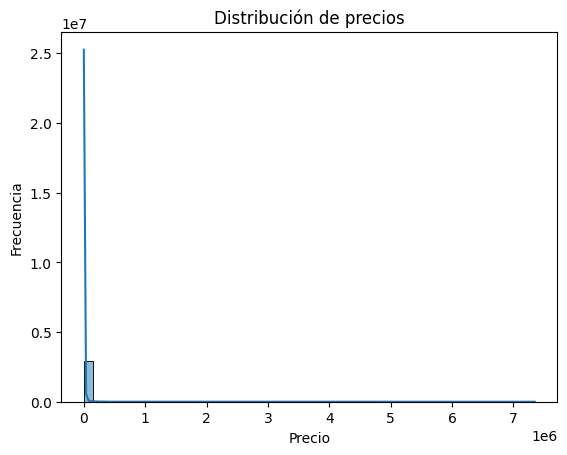

In [9]:

# Distribución de precios
if 'productos_precio_lista' in producto.columns:
    sns.histplot(producto['productos_precio_lista'].dropna(), bins=50, kde=True)
    plt.title("Distribución de precios")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.show()



En ese grafico no puede verse mucho por la cantidad de valores dispersos. Con el objetivo de visualizar mejor la dispersion, graficamos los Outliers:

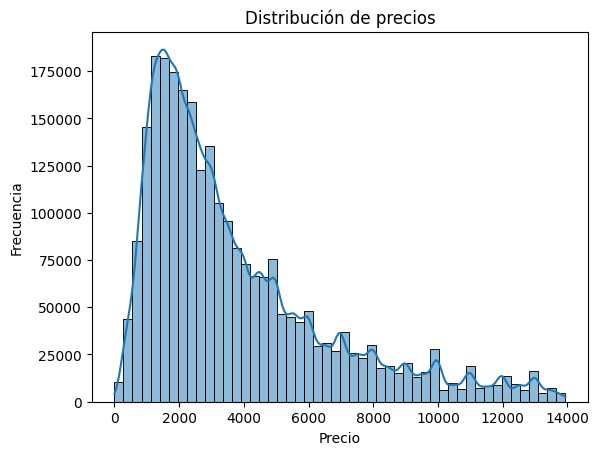

In [10]:
sns.histplot(producto_sin_outliers['productos_precio_lista'].dropna(), bins=50, kde=True)
#, kde=True
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


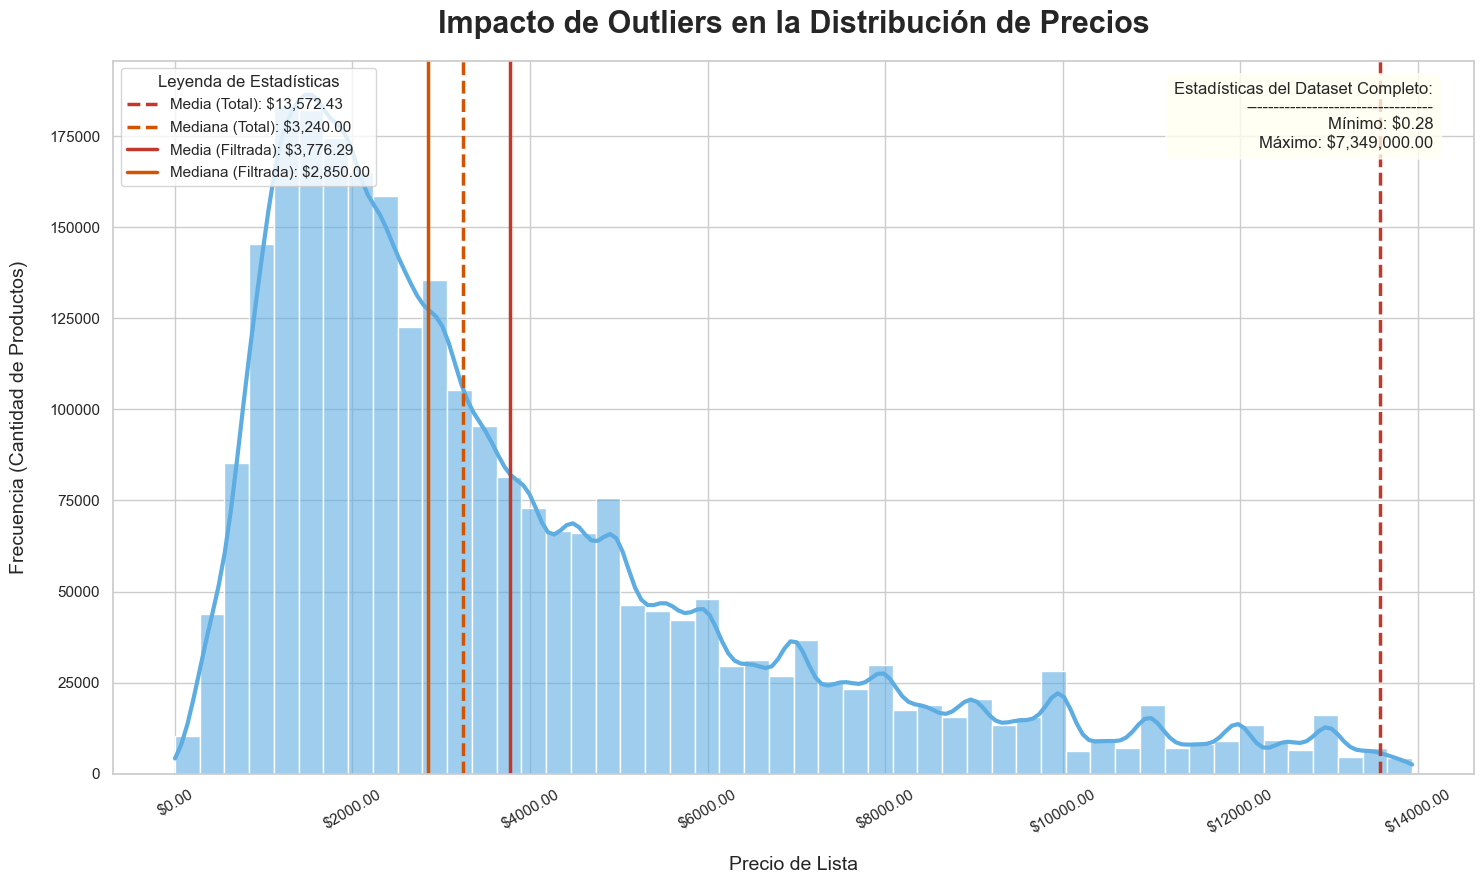

In [ ]:


# 1. Definir la columna a graficar y analizar
columna_precio = 'productos_precio_lista'

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
plt.figure(figsize=(15, 9))

# 3. Graficar el histograma de los datos SIN outliers
ax = sns.histplot(
    data=producto_sin_outliers,
    x=columna_precio,
    bins=50,
    kde=True,
    color='#5dade2', # <-- ¡AQUÍ ESTÁ EL CAMBIO! Color celeste profesional
    alpha=0.6,
    line_kws={'linewidth': 3, 'color': '#2c3e50'}
)

# 4. Calcular y añadir las 4 líneas estadísticas
# --- Estadísticas del DataFrame COMPLETO (con outliers) ---
media_total = producto[columna_precio].mean()
mediana_total = producto[columna_precio].median()
plt.axvline(media_total, color='#c0392b', linestyle='--', linewidth=2.5, label=f'Media (Total): ${media_total:,.2f}')
plt.axvline(mediana_total, color='#d35400', linestyle='--', linewidth=2.5, label=f'Mediana (Total): ${mediana_total:,.2f}')

# --- Estadísticas del DataFrame FILTRADO (sin outliers) ---
media_filtrada = producto_sin_outliers[columna_precio].mean()
mediana_filtrada = producto_sin_outliers[columna_precio].median()
plt.axvline(media_filtrada, color='#c0392b', linestyle='-', linewidth=2.5, label=f'Media (Filtrada): ${media_filtrada:,.2f}')
plt.axvline(mediana_filtrada, color='#d35400', linestyle='-', linewidth=2.5, label=f'Mediana (Filtrada): ${mediana_filtrada:,.2f}')


# 5. Calcular Mín/Máx del DataFrame COMPLETO para el cuadro de texto
min_total = producto[columna_precio].min()
max_total = producto[columna_precio].max()
texto_estadisticas = (
    f"Estadísticas del Dataset Completo:\n"
    f"----------------------------------\n"
    f"Mínimo: ${min_total:,.2f}\n"
    f"Máximo: ${max_total:,.2f}"
)

# 6. Añadir el cuadro de texto
props = dict(boxstyle='round,pad=0.5', facecolor='ivory', alpha=0.8)
ax.text(0.97, 0.97, texto_estadisticas, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# 7. Mejorar Títulos y Etiquetas
plt.title("Impacto de Outliers en la Distribución de Precios", fontsize=22, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=14, labelpad=15)
plt.ylabel("Frecuencia (Cantidad de Productos)", fontsize=14, labelpad=15)

# 8. Formatear el eje X para que parezca dinero
formatter = mticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=30)

# 9. Añadir una leyenda clara y bien ubicada
plt.legend(title='Leyenda de Estadísticas', fontsize=11, loc='upper left')

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR LA FIGURA EN UN ARCHIVO (antes de mostrarla)
plt.savefig('grafico_comparativo_precios.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico en pantalla
plt.show()

# --- FIN DEL CÓDIGO DEL GRÁFICO ---

In [ ]:
producto.loc[producto['productos_precio_lista'] == producto['productos_precio_lista'].max()]

,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1
53507,2,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,S/D,7349000.0,7349000.0,1,UNI,6199000.0,Promo A valida desde el 24/06/2025 hasta 29/06...
776165,11,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,S/D,7349000.0,7349000.0,1,UNI,NaN,NaN
787613,8,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,S/D,7349000.0,7349000.0,1,UNI,NaN,NaN


In [15]:
producto.loc[producto['productos_precio_lista'] == producto['productos_precio_lista'].min()]

,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1
942985,128,7798111301552,BOLSA AMERICANA 26X12X37.5 X 500 UNID,UNI,S/D,0.28,0.28,1,UNI,NaN,NaN


### Top marcas

**un comentario a cerca de esto:**


Hay que pasar la columna productos_marca al tipo String (con S mayuscula, distinto al string)



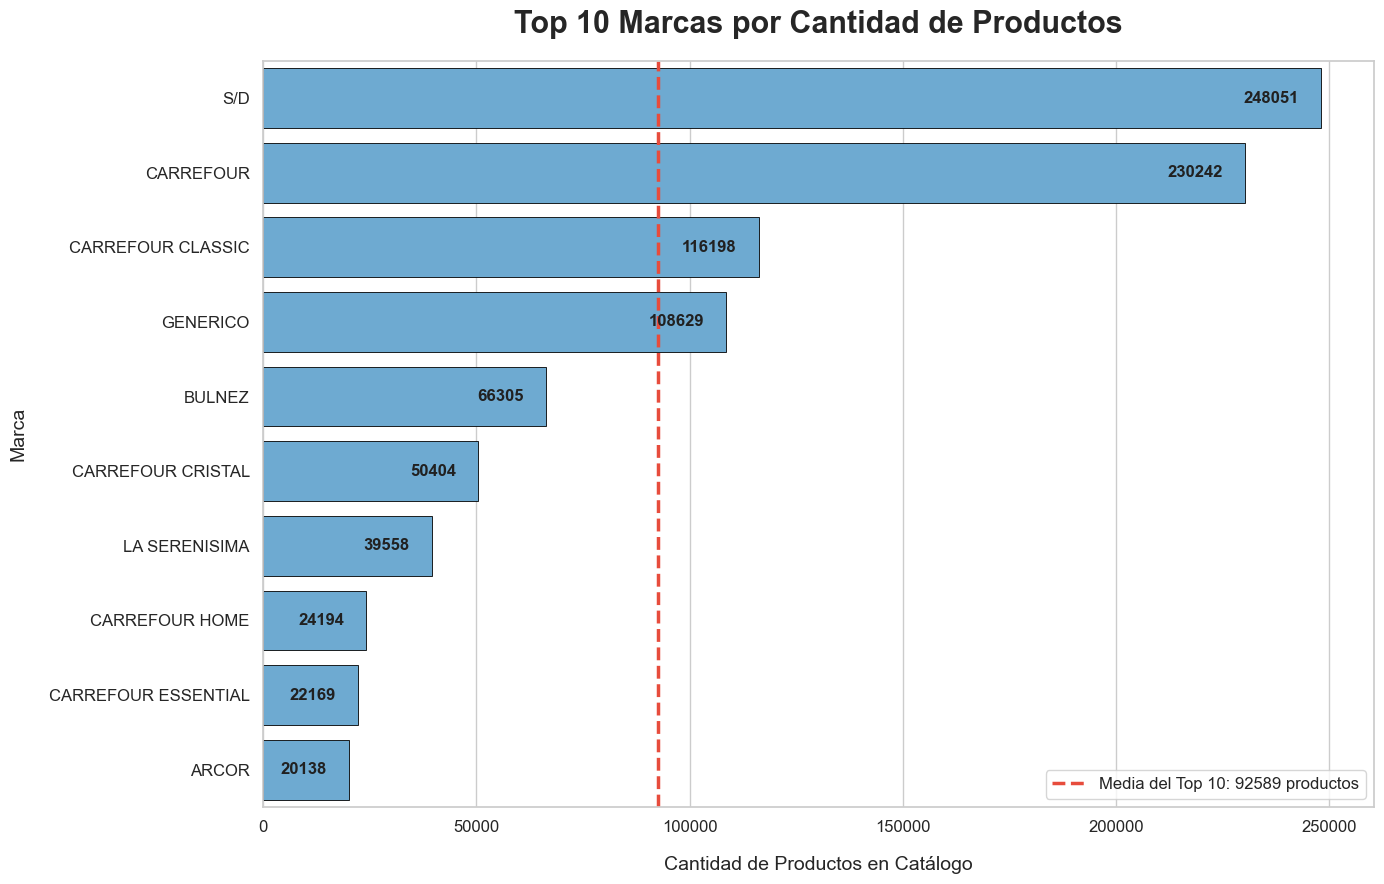

In [17]:


# 1. Preparar los datos
top_marcas = producto['productos_marca'].value_counts().head(10)

# 2. Calcular la media de productos para el Top 10 (la línea de referencia)
media_top10 = top_marcas.mean()

# 3. Establecer el tema y el tamaño de la figura
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 9))

# 4. Crear el gráfico de barras con el color celeste definido
ax = sns.barplot(
    x=top_marcas.values,
    y=top_marcas.index,
    color='#5dade2',  # <-- Color principal consistente con el gráfico anterior
    edgecolor='black',
    linewidth=0.6
)

# 5. Añadir la línea de la media con el color de acento rojo
ax.axvline(x=media_top10, color='#e74c3c', linestyle='--', linewidth=2.5,
            label=f'Media del Top 10: {media_top10:.0f} productos')

# 6. Añadir etiquetas de datos a las barras
#    Usaremos texto oscuro ya que el color de la barra es claro
for p in ax.patches:
    width = p.get_width()
    ax.text(width - (ax.get_xlim()[1] * 0.02), # Posición X (un 2% desde el borde)
            p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            ha='right',
            va='center',
            fontsize=12,
            color='#212121', # Un negro no tan intenso, muy legible
            weight='bold')

# 7. Títulos y Etiquetas con el mismo estilo profesional
plt.title("Top 10 Marcas por Cantidad de Productos", fontsize=22, pad=20, weight='bold')
plt.xlabel("Cantidad de Productos en Catálogo", fontsize=14, labelpad=15)
plt.ylabel("Marca", fontsize=14, labelpad=15)

# 8. Ajustar los ticks de los ejes para mejor legibilidad
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 9. Añadir la leyenda para explicar la línea roja
plt.legend(fontsize=12, loc='lower right') # Mover a la esquina inferior derecha

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR la figura en un archivo
plt.savefig('top_10_marcas_estilo_consistente.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico
plt.show()

# --- FIN DEL CÓDIGO DEL GRÁFICO ---

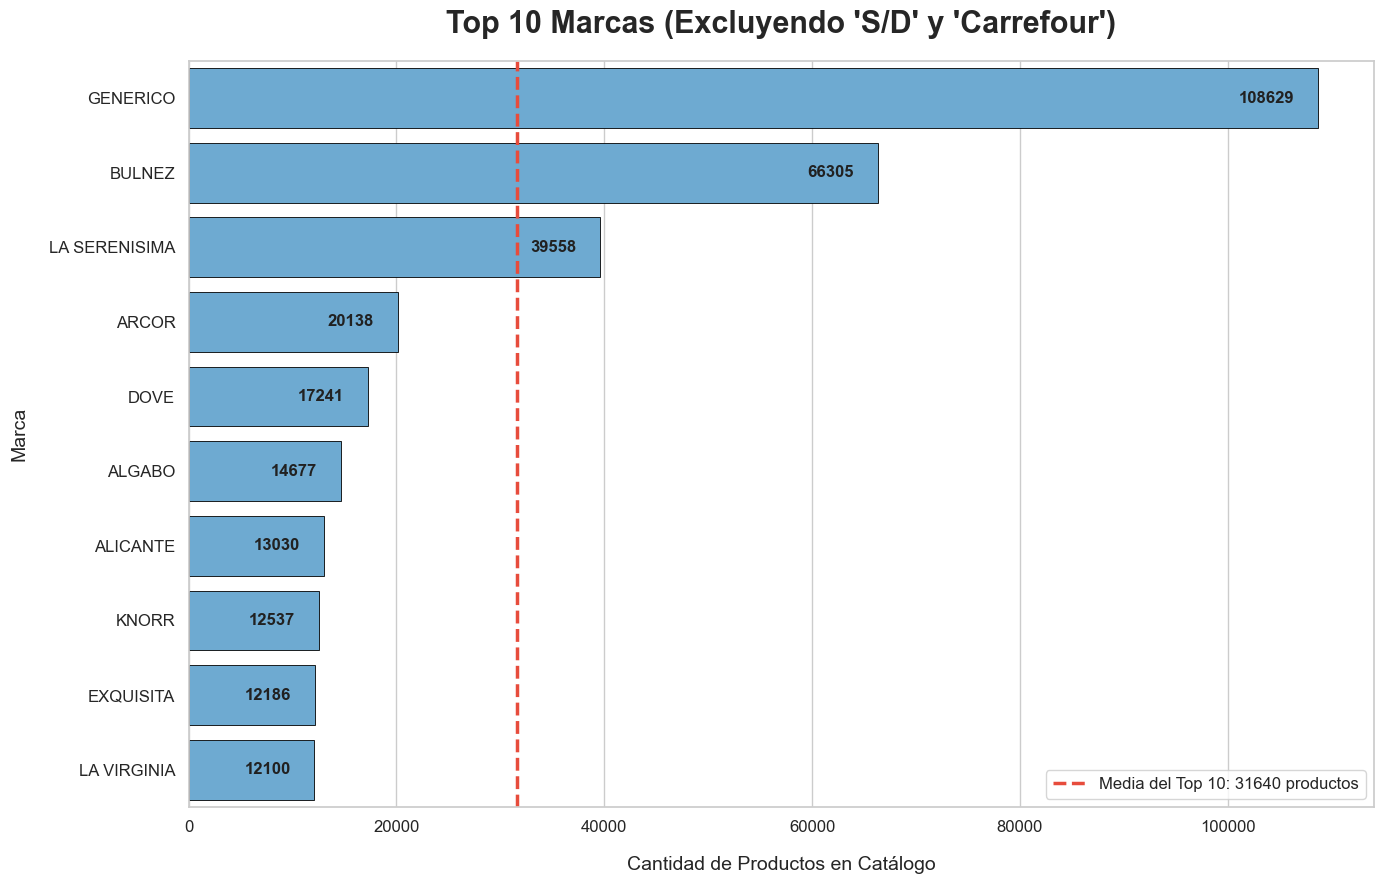

In [18]:


# --- INICIO DEL CÓDIGO ---

# 1. FILTRAR EL DATAFRAME
#    Crearemos un nuevo DataFrame llamado 'producto_filtrado'

# Condición 1: La marca NO debe ser 'S/D'.
filtro1 = producto['productos_marca'] != 'S/D'

# Condición 2: La marca NO debe contener 'CARREFOUR' (ignorando mayúsculas/minúsculas).
# El método .str.contains() es perfecto para esto.
# na=False asegura que los valores nulos (NaN) no den error y se traten como Falso.
filtro2 = ~producto['productos_marca'].str.contains('CARREFOUR', case=False, na=False)

# Aplicamos AMBOS filtros al DataFrame.
producto_filtrado = producto[filtro1 & filtro2]


# 2. PREPARAR LOS DATOS PARA EL GRÁFICO (usando el DataFrame filtrado)
top_marcas_filtrado = producto_filtrado['productos_marca'].value_counts().head(10)
media_top10_filtrado = top_marcas_filtrado.mean()


# 3. CREAR EL GRÁFICO (código idéntico en estilo al anterior)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 9))

ax = sns.barplot(
    x=top_marcas_filtrado.values,
    y=top_marcas_filtrado.index,
    color='#5dade2',
    edgecolor='black',
    linewidth=0.6
)

ax.axvline(x=media_top10_filtrado, color='#e74c3c', linestyle='--', linewidth=2.5,
            label=f'Media del Top 10: {media_top10_filtrado:.0f} productos')

for p in ax.patches:
    width = p.get_width()
    ax.text(width - (ax.get_xlim()[1] * 0.02),
            p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            ha='right',
            va='center',
            fontsize=12,
            color='#212121',
            weight='bold')

# Cambiamos el título para reflejar el filtrado
plt.title("Top 10 Marcas (Excluyendo 'S/D' y 'Carrefour')", fontsize=22, pad=20, weight='bold')
plt.xlabel("Cantidad de Productos en Catálogo", fontsize=14, labelpad=15)
plt.ylabel("Marca", fontsize=14, labelpad=15)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()

# GUARDAR con un nombre de archivo diferente
plt.savefig('top_10_marcas_filtrado_carrefour.png', dpi=300, bbox_inches='tight')

plt.show()

# --- FIN DEL CÓDIGO ---

Paso 1: Agrupando datos...
Paso 2: Creando los DataFrames Top 10 y Bottom 10...
Paso 3: Creando los gráficos...


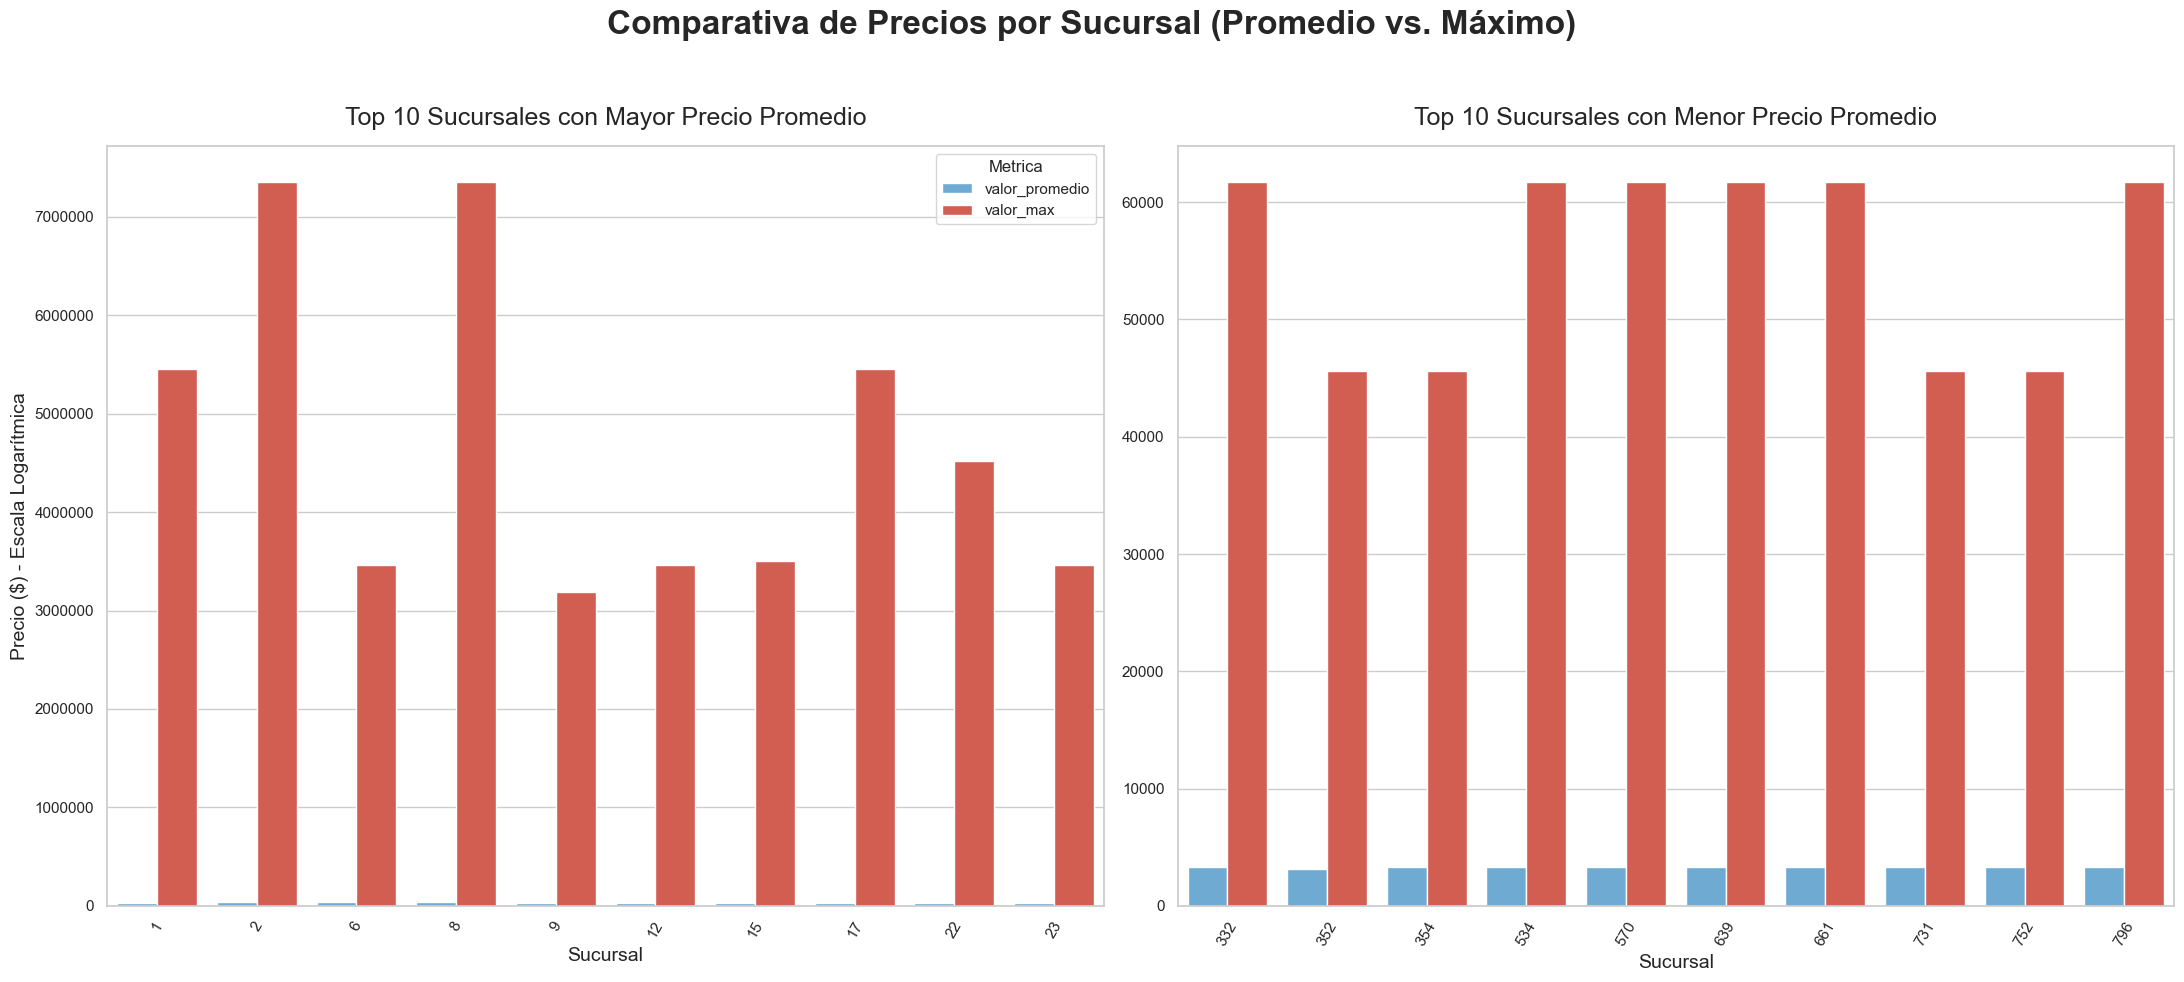


¡Proceso completado!


In [19]:
# Por sucursal:

# PASO 1: Agrupar por sucursal y calcular las estadísticas.
print("Paso 1: Agrupando datos...")
sucursal_stats = producto.groupby('id_sucursal')['productos_precio_lista'].agg(
    valor_promedio='mean',
    valor_max='max'
).reset_index()


# PASO 2: Crear los dos DataFrames separados: Top 10 y Bottom 10.
print("Paso 2: Creando los DataFrames Top 10 y Bottom 10...")
top_10_caros = sucursal_stats.nlargest(10, 'valor_promedio')
top_10_baratos = sucursal_stats.nsmallest(10, 'valor_promedio')


# PASO 3: Preparar los datos para un gráfico de barras agrupado.
# Usamos pd.melt() para transformar las columnas 'valor_promedio' y 'valor_max' en filas.
top_10_caros_long = pd.melt(top_10_caros, id_vars='id_sucursal', value_vars=['valor_promedio', 'valor_max'], var_name='Metrica', value_name='Precio')
top_10_baratos_long = pd.melt(top_10_baratos, id_vars='id_sucursal', value_vars=['valor_promedio', 'valor_max'], var_name='Metrica', value_name='Precio')


# PASO 4: Crear la figura con DOS subplots.
print("Paso 3: Creando los gráficos...")
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
fig.suptitle("Comparativa de Precios por Sucursal (Promedio vs. Máximo)", fontsize=24, weight='bold')


# --- GRÁFICO IZQUIERDO: TOP 10 MÁS CARAS ---
ax_izq = axes[0]
sns.barplot(
    data=top_10_caros_long,
    x='id_sucursal',
    y='Precio',
    hue='Metrica', # Esto crea las barras agrupadas
    palette={'valor_promedio': '#5dade2', 'valor_max': '#e74c3c'},
    ax=ax_izq
)
ax_izq.set_title('Top 10 Sucursales con Mayor Precio Promedio', fontsize=18, pad=15)
ax_izq.set_xlabel('Sucursal', fontsize=14)
ax_izq.set_ylabel('Precio ($) - Escala Logarítmica', fontsize=14)


# --- GRÁFICO DERECHO: TOP 10 MÁS BARATAS ---
ax_der = axes[1]
sns.barplot(
    data=top_10_baratos_long,
    x='id_sucursal',
    y='Precio',
    hue='Metrica',
    palette={'valor_promedio': '#5dade2', 'valor_max': '#e74c3c'},
    ax=ax_der
)
ax_der.set_title('Top 10 Sucursales con Menor Precio Promedio', fontsize=18, pad=15)
ax_der.set_xlabel('Sucursal', fontsize=14)
ax_der.set_ylabel('') # No repetir la etiqueta del eje Y
ax_der.get_legend().remove() # Quitar leyenda duplicada


# --- !! LA SOLUCIÓN AL PROBLEMA DE ESCALA: ESCALA LOGARÍTMICA !! ---
# Aplicamos esto a AMBOS gráficos.
#ax_izq.set_yscale('log')
#ax_der.set_yscale('log')


# --- PASO 5: Mejoras finales y guardado ---

# Formatear el eje Y de ambos gráficos para que los números no estén en notación científica.
formatter = mticker.ScalarFormatter()
formatter.set_scientific(False)
ax_izq.yaxis.set_major_formatter(formatter)
ax_der.yaxis.set_major_formatter(formatter)

# Rotar las etiquetas del eje X en ambos gráficos para legibilidad.
ax_izq.tick_params(axis='x', rotation=60)
ax_der.tick_params(axis='x', rotation=60)

# Ajustar layout y guardar
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('grafico_barras_agrupado_final.png', dpi=300)
plt.show()

print("\n¡Proceso completado!")

# No se por que no me sale el sigueinte graficoooo!!!!

El precio esta en escala lineal. lo que pasa es que la diferencia entre el precio promedio y el precio maximo es tremenda. entonces, se me ocurre en cada grafico (el de la izquierda con las 10 sucursales mas caras y el de la derecha con las 10 sucursales mas caras) ponerle un eje aparte para el promedio. es decir un eje para precios maximos y otra a la derecha para los precio minimos.

Paso 1: Agrupando datos...
Paso 2: Creando los DataFrames Top 10 y Bottom 10...
Paso 3: Creando los gráficos con doble eje...


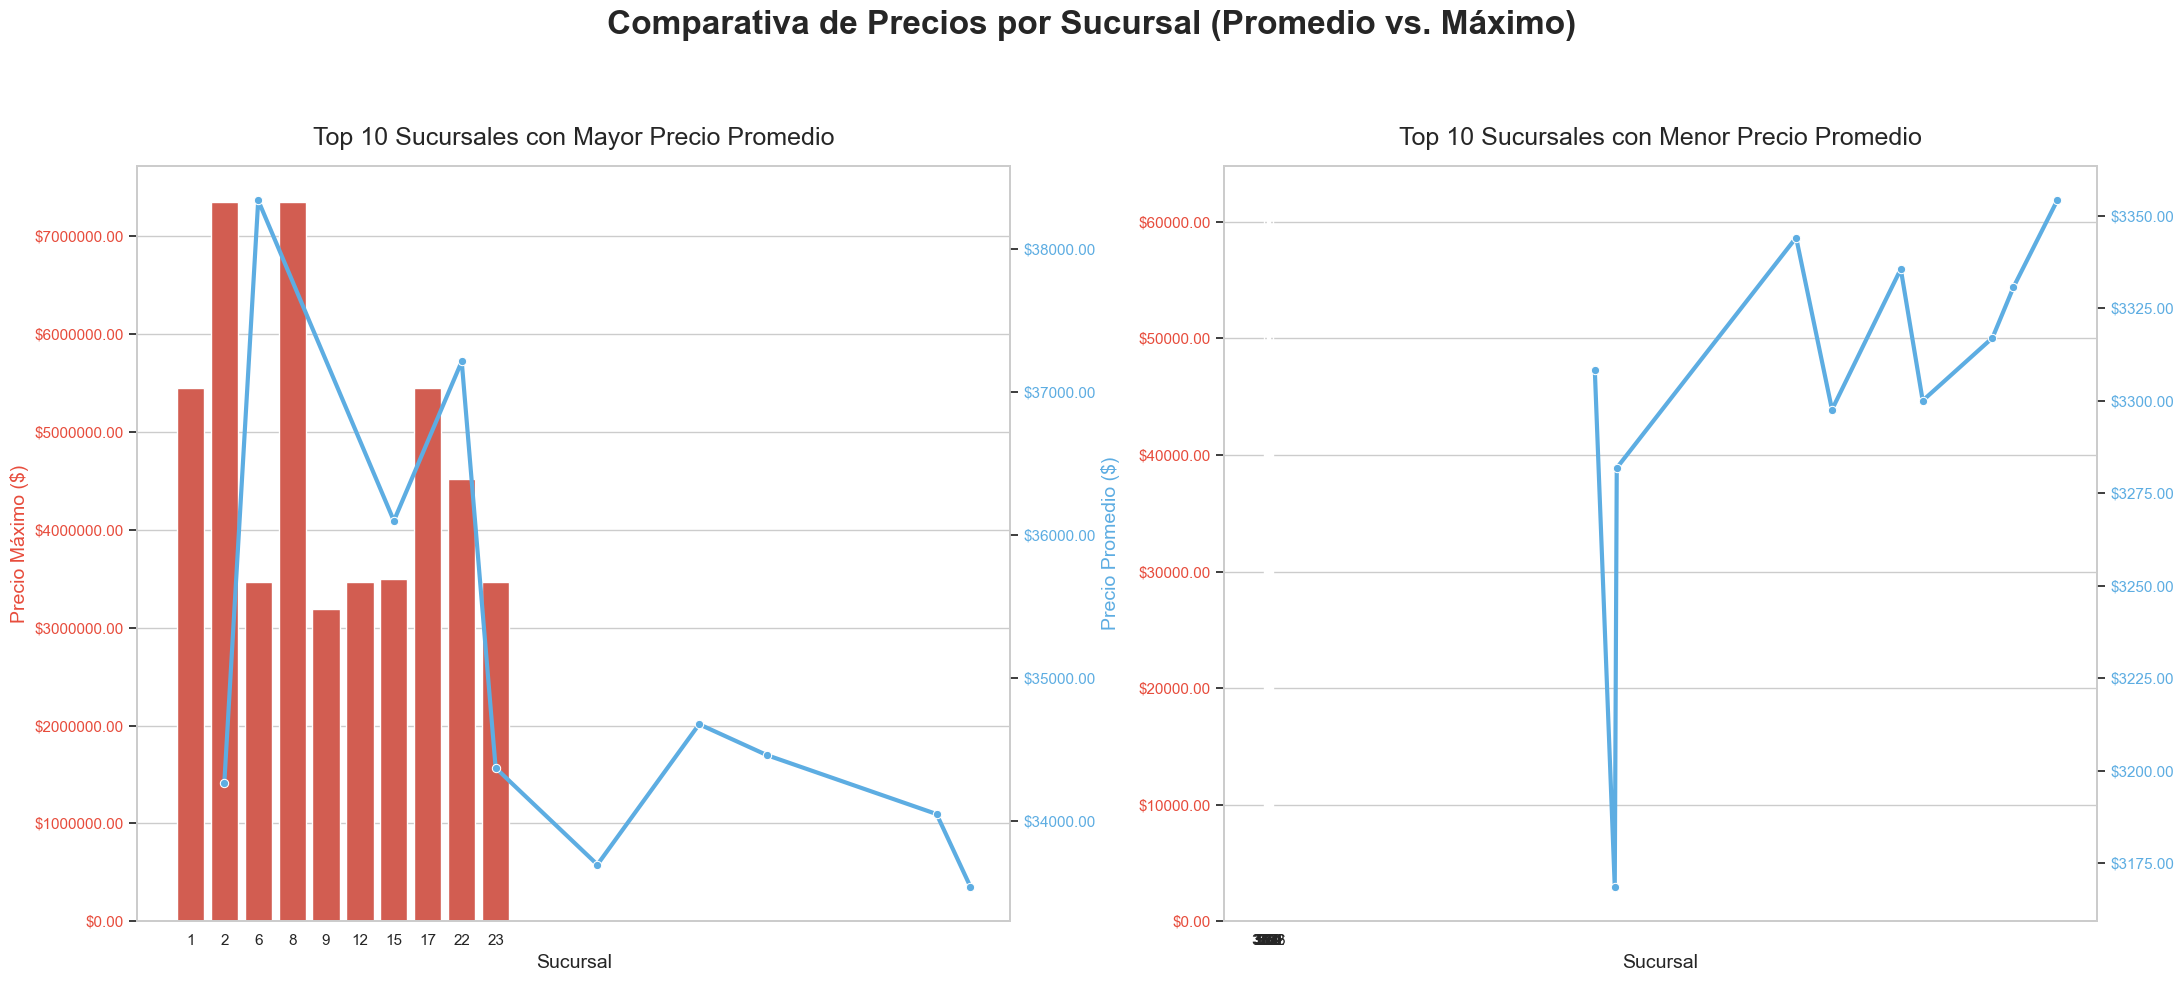


Proceso completado.


In [ ]:
# No se por que no me sale este graficoooooo!!!!!!


# PASO 1: Agrupar por sucursal y calcular las estadísticas.
print("Paso 1: Agrupando datos...")
sucursal_stats = producto.groupby('id_sucursal')['productos_precio_lista'].agg(
    valor_promedio='mean',
    valor_max='max'
).reset_index()


# PASO 2: Crear los dos DataFrames separados: Top 10 y Bottom 10.
print("Paso 2: Creando los DataFrames Top 10 y Bottom 10...")
top_10_caros = sucursal_stats.nlargest(10, 'valor_promedio')
top_10_baratos = sucursal_stats.nsmallest(10, 'valor_promedio')


# PASO 3: Crear la figura con DOS subplots.
print("Paso 3: Creando los gráficos con doble eje...")
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
fig.suptitle("Comparativa de Precios por Sucursal (Promedio vs. Máximo)", fontsize=24, weight='bold')

# Definir colores para consistencia
color_maximo = '#e74c3c' # Rojo para el máximo (valor más grande)
color_promedio = '#5dade2' # Celeste para el promedio


# --- GRÁFICO IZQUIERDO: TOP 10 MÁS CARAS ---
ax_izq = axes[0]
# EJE IZQUIERDO (ax_izq) para el VALOR MÁXIMO
sns.barplot(
    data=top_10_caros, x='id_sucursal', y='valor_max',
    color=color_maximo, ax=ax_izq
)
ax_izq.set_ylabel('Precio Máximo ($)', color=color_maximo, fontsize=14)
ax_izq.tick_params(axis='y', labelcolor=color_maximo)
ax_izq.set_title('Top 10 Sucursales con Mayor Precio Promedio', fontsize=18, pad=15)
ax_izq.set_xlabel('Sucursal', fontsize=14)

# EJE DERECHO (ax_izq_twin) para el VALOR PROMEDIO
ax_izq_twin = ax_izq.twinx()
sns.lineplot(
    data=top_10_caros, x='id_sucursal', y='valor_promedio',
    color=color_promedio, marker='o', linewidth=3, ax=ax_izq_twin
)
ax_izq_twin.set_ylabel('Precio Promedio ($)', color=color_promedio, fontsize=14)
ax_izq_twin.tick_params(axis='y', labelcolor=color_promedio)
ax_izq_twin.grid(False) # Desactivar la segunda grilla para no saturar


# --- GRÁFICO DERECHO: TOP 10 MÁS BARATAS ---
ax_der = axes[1]
# EJE IZQUIERDO (ax_der) para el VALOR MÁXIMO
sns.barplot(
    data=top_10_baratos, x='id_sucursal', y='valor_max',
    color=color_maximo, ax=ax_der
)
ax_der.set_ylabel('') # No repetir etiqueta del eje
ax_der.tick_params(axis='y', labelcolor=color_maximo)
ax_der.set_title('Top 10 Sucursales con Menor Precio Promedio', fontsize=18, pad=15)
ax_der.set_xlabel('Sucursal', fontsize=14)

# EJE DERECHO (ax_der_twin) para el VALOR PROMEDIO
ax_der_twin = ax_der.twinx()
sns.lineplot(
    data=top_10_baratos, x='id_sucursal', y='valor_promedio',
    color=color_promedio, marker='o', linewidth=3, ax=ax_der_twin
)
ax_der_twin.set_ylabel('') # No repetir etiqueta del eje
ax_der_twin.tick_params(axis='y', labelcolor=color_promedio)
ax_der_twin.grid(False)


# --- PASO 4: Mejoras finales y guardado ---

# Formatear todos los ejes Y como moneda
formatter = mticker.FormatStrFormatter('$%1.2f')
for ax in [ax_izq, ax_der, ax_izq_twin, ax_der_twin]:
    ax.yaxis.set_major_formatter(formatter)

## Rotar las etiquetas del eje X en ambos gráficos
#for ax in [ax_izq, ax_der]:
#    ax.tick_params(axis='x', rotation=60)

# Crear una leyenda unificada
#from matplotlib.lines import Line2D
#legend_elements = [
#    plt.Rectangle((0,0),1,1, color=color_maximo, label='Precio Máximo'),
#    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_promedio, markersize=10, label='Precio Promedio', linewidth=3)
#]
#fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=14)

# Ajustar layout y guardar
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig('grafico_barras_doble_eje.png', dpi=300)
plt.show()

print("\nProceso completado.")

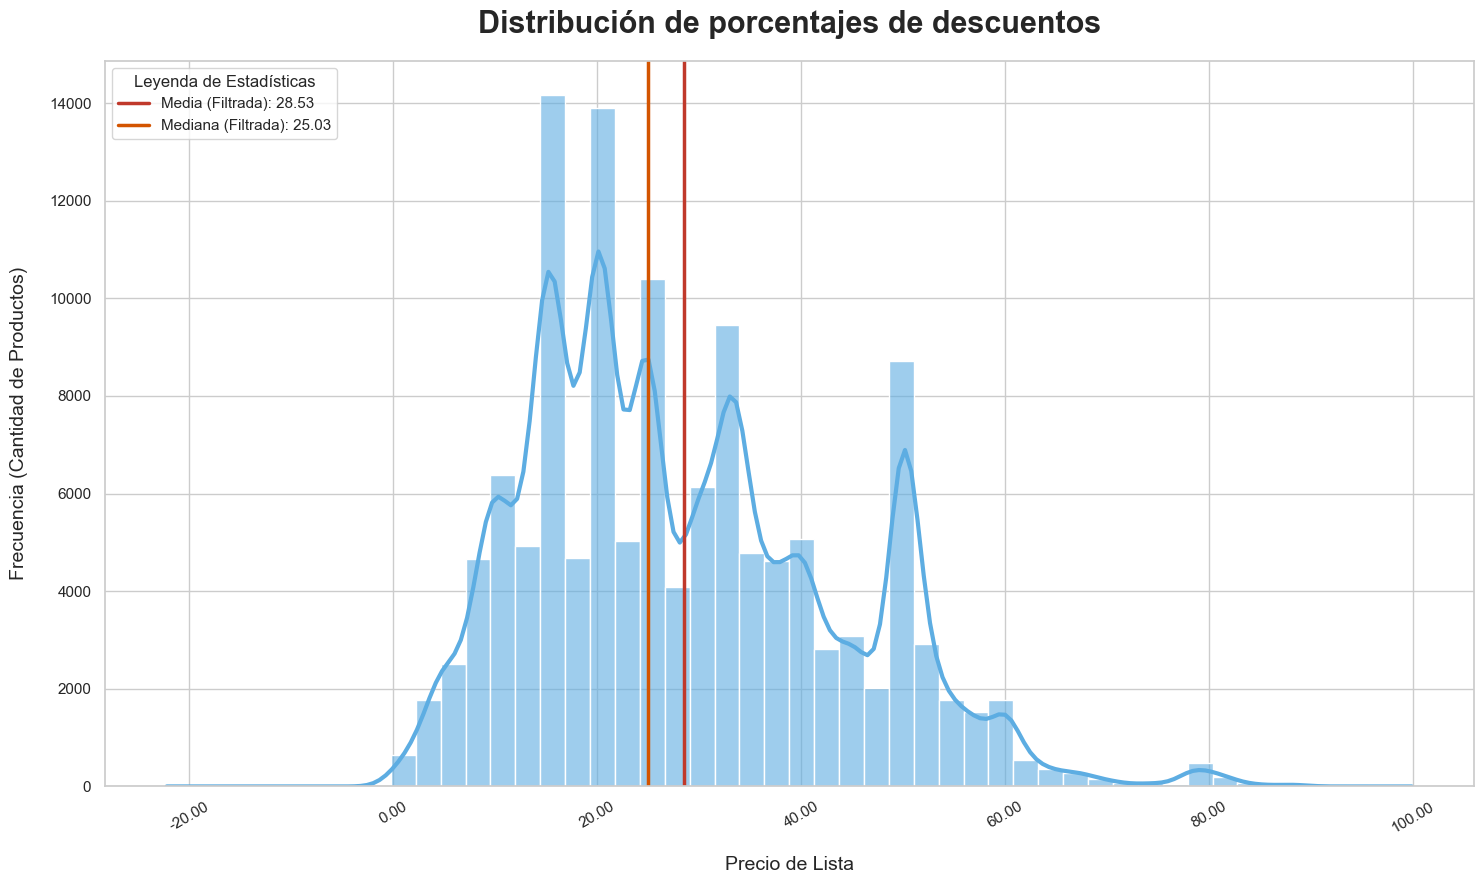

In [22]:
promociones = producto[producto['productos_precio_unitario_promo1'].notnull()].copy()

promociones['descuento'] = (promociones['productos_precio_lista']- promociones['productos_precio_unitario_promo1'])/promociones['productos_precio_lista']*100
# --- INICIO DEL CÓDIGO DEL GRÁFICO ---

# 1. Definir la columna a graficar y analizar
columna_precio = 'descuento'

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
plt.figure(figsize=(15, 9))

# 3. Graficar el histograma de los datos SIN outliers
ax = sns.histplot(
    data=promociones,
    x=columna_precio,
    bins=50,
    kde=True,
    color='#5dade2', # <-- ¡AQUÍ ESTÁ EL CAMBIO! Color celeste profesional
    alpha=0.6,
    line_kws={'linewidth': 3, 'color': '#2c3e50'}
)

# --- Estadísticas del DataFrame FILTRADO (sin outliers) ---
media_filtrada = promociones[columna_precio].mean()
mediana_filtrada = promociones[columna_precio].median()
plt.axvline(media_filtrada, color='#c0392b', linestyle='-', linewidth=2.5, label=f'Media (Filtrada): {media_filtrada:,.2f}')
plt.axvline(mediana_filtrada, color='#d35400', linestyle='-', linewidth=2.5, label=f'Mediana (Filtrada): {mediana_filtrada:,.2f}')


# 5. Calcular Mín/Máx del DataFrame COMPLETO para el cuadro de texto
min_total = promociones[columna_precio].min()
max_total = promociones[columna_precio].max()
texto_estadisticas = (
    f"Estadísticas del Dataset Completo:\n"
    f"----------------------------------\n"
    f"Mínimo: {min_total:,.2f}\n"
    f"Máximo: {max_total:,.2f}"
)

# 6. Añadir el cuadro de texto
#props = dict(boxstyle='round,pad=0.5', facecolor='ivory', alpha=0.8)
#ax.text(0.97, 0.97, texto_estadisticas, transform=ax.transAxes, fontsize=12,
        #verticalalignment='top', horizontalalignment='right', bbox=props)

# 7. Mejorar Títulos y Etiquetas
plt.title("Distribución de porcentajes de descuentos", fontsize=22, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=14, labelpad=15)
plt.ylabel("Frecuencia (Cantidad de Productos)", fontsize=14, labelpad=15)

# 8. Formatear el eje X para que parezca dinero
formatter = mticker.FormatStrFormatter('%1.2f')
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=30)

# 9. Añadir una leyenda clara y bien ubicada
plt.legend(title='Leyenda de Estadísticas', fontsize=11, loc='upper left')

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR LA FIGURA EN UN ARCHIVO (antes de mostrarla)
plt.savefig('grafico_comparativo_precios.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico en pantalla
plt.show()


**Interpretación de gráficos:**

- La mayoría de los precios se concentran en rangos bajos, con una cola larga hacia valores altos (distribución sesgada).
- Algunas marcas dominan fuertemente la cantidad de productos disponibles, lo que podría indicar concentración de mercado o mayor cobertura.


## Parte 3 - Planteo de un problema supervisado de Machine Learning


**Problema planteado:** Clasificación del rubro del producto a partir de su descripción y atributos.

- Tipo: Clasificación
- Variable target: `rubro` o `categoria` (dependiendo de las columnas existentes)
- Variables predictoras: `descripcion`, `marca`, `presentacion`, `contenido_neto`, `unidad_medida`, `precio` (si está disponible)

**Aplicaciones posibles:** Mejora de sistemas de recomendación, categorización automática de nuevos productos, control de carga de datos.

Este problema permite entrenar un modelo para aprender patrones en las características y asignar la clase correspondiente al producto.


In [22]:
precio_por_sucursal = producto.groupby(by=['id_sucursal']) ['productos_precio_lista'].mean()
precio_por_sucursal

id_sucursal
1      34261.097656
2      38342.617188
5      29580.134766
6      36098.660156
7      31509.927734
           ...     
806     3573.596436
807     3485.632812
808     3480.891602
809     3632.412598
810     3723.873535
Name: productos_precio_lista, Length: 567, dtype: float32